In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [2]:
data = "../RawData/muon.data"
data = pd.read_csv(data, delimiter=',')

print(data)

         40000  1715382134
0        40000  1715382135
1        40000  1715382136
2        40000  1715382137
3        40000  1715382138
4        40000  1715382139
...        ...         ...
3001303  40000  1730315405
3001304  40000  1730315406
3001305  40000  1730315407
3001306  40000  1730315408
3001307  40000  1730315409

[3001308 rows x 2 columns]


In [3]:
df=pd.DataFrame(data)
df

,40000,1715382134
0,40000,1715382135
1,40000,1715382136
2,40000,1715382137
3,40000,1715382138
4,40000,1715382139
...,...,...
3001303,40000,1730315405
3001304,40000,1730315406
3001305,40000,1730315407
3001306,40000,1730315408


In [4]:
df=df.rename(columns={'40000':'Tiempo','1715382134':'Fecha'})
df

,Tiempo,Fecha
0,40000,1715382135
1,40000,1715382136
2,40000,1715382137
3,40000,1715382138
4,40000,1715382139
...,...,...
3001303,40000,1730315405
3001304,40000,1730315406
3001305,40000,1730315407
3001306,40000,1730315408


In [5]:
df1=df.drop('Fecha', axis=1)
df1=df1[df1['Tiempo']<40000]

In [6]:
tiempos = df1["Tiempo"]

separador_bins = list(range(0, 40001, 20))

tiempos_separados = pd.cut(tiempos, bins=separador_bins)

frecuencias = tiempos_separados.value_counts().sort_index()

print(frecuencias)

Tiempo
(0, 20]              0
(20, 40]          6189
(40, 60]          5894
(60, 80]           628
(80, 100]          963
                  ... 
(39900, 39920]       0
(39920, 39940]       0
(39940, 39960]       0
(39960, 39980]       0
(39980, 40000]       0
Name: count, Length: 2000, dtype: int64


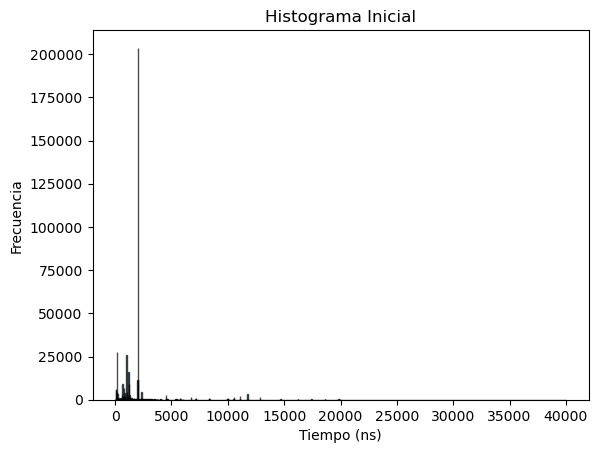

In [7]:
plt.hist(tiempos, bins=separador_bins, edgecolor='black', alpha=0.7)

plt.xlabel('Tiempo (ns)')
plt.ylabel('Frecuencia')
plt.title('Histograma Inicial')

In [8]:
df1=df1[df1['Tiempo']!=2000]
df1=df1[df1['Tiempo']!=920]
df1=df1[df1['Tiempo']!=10000]
df1=df1[df1['Tiempo']!=9980]
df1=df1[df1['Tiempo']!=9960]
df1=df1[df1['Tiempo']!=9940]
df1=df1[df1['Tiempo']!=9940]
df1=df1[df1['Tiempo']!=9920]
df1=df1[df1['Tiempo']!=9900]

"""
df1=df1[df1['Tiempo']!=2000]
df1=df1[df1['Tiempo']!=920]
df1=df1[df1['Tiempo']!=10000]
df1=df1[df1['Tiempo']!=9980]
df1=df1[df1['Tiempo']!=9960]
df1=df1[df1['Tiempo']!=9940]
df1=df1[df1['Tiempo']!=9940]
df1=df1[df1['Tiempo']!=9920]
"""

"\ndf1=df1[df1['Tiempo']!=2000]\ndf1=df1[df1['Tiempo']!=920]\ndf1=df1[df1['Tiempo']!=10000]\ndf1=df1[df1['Tiempo']!=9980]\ndf1=df1[df1['Tiempo']!=9960]\ndf1=df1[df1['Tiempo']!=9940]\ndf1=df1[df1['Tiempo']!=9940]\ndf1=df1[df1['Tiempo']!=9920]\n"

In [9]:
tiempos = df1["Tiempo"]

separador_bins = list(range(0, 40001, 20))

tiempos_separados = pd.cut(tiempos, bins=separador_bins)

frecuencias = tiempos_separados.value_counts().sort_index()

print(frecuencias)

Tiempo
(0, 20]              0
(20, 40]          6189
(40, 60]          5894
(60, 80]           628
(80, 100]          963
                  ... 
(39900, 39920]       0
(39920, 39940]       0
(39940, 39960]       0
(39960, 39980]       0
(39980, 40000]       0
Name: count, Length: 2000, dtype: int64


In [10]:
frecuencias_df = frecuencias.reset_index()

frecuencias_df.columns = ['Bin', 'Frecuencia']

frecuencias_df

,Bin,Frecuencia
0,"(0, 20]",0
1,"(20, 40]",6189
2,"(40, 60]",5894
3,"(60, 80]",628
4,"(80, 100]",963
...,...,...
1995,"(39900, 39920]",0
1996,"(39920, 39940]",0
1997,"(39940, 39960]",0
1998,"(39960, 39980]",0


In [11]:
frecuencias_df['Limite Inferior'] = frecuencias_df['Bin'].apply(lambda x: x.left)
frecuencias_df['Limite Superior'] = frecuencias_df['Bin'].apply(lambda x: x.right)

frecuencias_df['Promedio'] = (frecuencias_df['Limite Inferior'].astype(float) + frecuencias_df['Limite Superior'].astype(float)) / 2

frecuencias_df

,Bin,Frecuencia,Limite Inferior,Limite Superior,Promedio
0,"(0, 20]",0,0,20,10.0
1,"(20, 40]",6189,20,40,30.0
2,"(40, 60]",5894,40,60,50.0
3,"(60, 80]",628,60,80,70.0
4,"(80, 100]",963,80,100,90.0
...,...,...,...,...,...
1995,"(39900, 39920]",0,39900,39920,39910.0
1996,"(39920, 39940]",0,39920,39940,39930.0
1997,"(39940, 39960]",0,39940,39960,39950.0
1998,"(39960, 39980]",0,39960,39980,39970.0


In [12]:
most_frequent_value = tiempos.value_counts().idxmax()

most_frequent_value

180

Text(0.5, 1.0, 'Histograma Final')

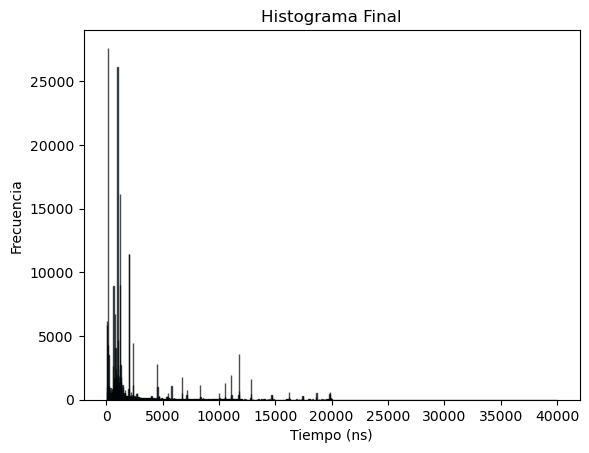

In [13]:
plt.hist(tiempos, bins=separador_bins, edgecolor='black', alpha=0.7)

plt.xlabel('Tiempo (ns)')
plt.ylabel('Frecuencia')
plt.title('Histograma Final')

In [14]:
tiempo_prom, frecuencia=np.array(frecuencias_df['Promedio']), np.array(frecuencias_df['Frecuencia'])

In [15]:
f_cum=np.cumsum(frecuencia)

total_decaimientos = frecuencias_df['Frecuencia'].sum()

In [16]:
decaimiento=total_decaimientos-f_cum
#decay[-1]=1/10000000


Text(0, 0.5, 'Frecuencia')

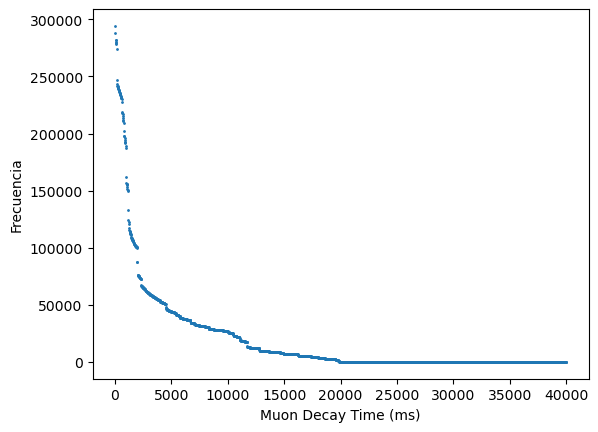

In [17]:
plt.scatter(tiempo_prom, decaimiento, s=1)
plt.xlabel('Muon Decay Time (ms)')
plt.ylabel('Frecuencia')

In [18]:
def fit_ruido(X, tau, B):
    return (total_decaimientos)*np.exp(-X/tau) + B

popt, pcov = curve_fit( fit_ruido, tiempo_prom, decaimiento, p0 = (2.2, 0), absolute_sigma=True, maxfev = 10000 )

In [19]:
tau_ruido = popt[0]
B = popt[1]

print(tau_ruido)
print(B)

1856.7155120134332
5729.619507435102


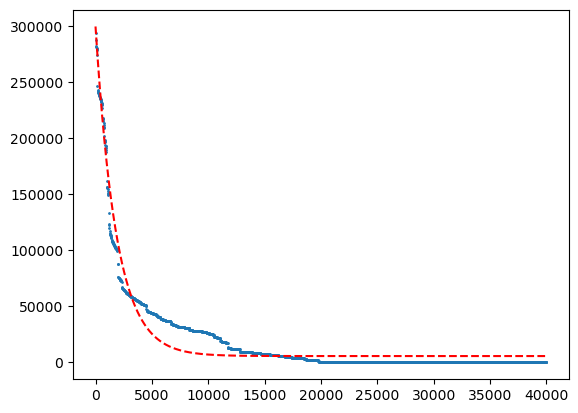

In [20]:
X = np.linspace(0, 40000, 400001)
plt.plot( X, fit_ruido(X, tau_ruido, B), color="red", linestyle="--" )

plt.scatter(tiempo_prom, decaimiento, s=1)

In [21]:
last_non_zero_index = frecuencias_df[frecuencias_df['Frecuencia'] > 0].index[-1]

frecuencias_df_filtrada = frecuencias_df.loc[:last_non_zero_index]

frecuencias_df_filtrada

,Bin,Frecuencia,Limite Inferior,Limite Superior,Promedio
0,"(0, 20]",0,0,20,10.0
1,"(20, 40]",6189,20,40,30.0
2,"(40, 60]",5894,40,60,50.0
3,"(60, 80]",628,60,80,70.0
4,"(80, 100]",963,80,100,90.0
...,...,...,...,...,...
994,"(19880, 19900]",99,19880,19900,19890.0
995,"(19900, 19920]",157,19900,19920,19910.0
996,"(19920, 19940]",54,19920,19940,19930.0
997,"(19940, 19960]",40,19940,19960,19950.0


In [22]:
tiempo_prom, frecuencia=np.array(frecuencias_df['Promedio']), np.array(frecuencias_df['Frecuencia'])

In [23]:
f_cum=np.cumsum(frecuencia)

total_decaimientos = frecuencias_df['Frecuencia'].sum() - B

In [24]:
decaimiento=total_decaimientos - f_cum - B

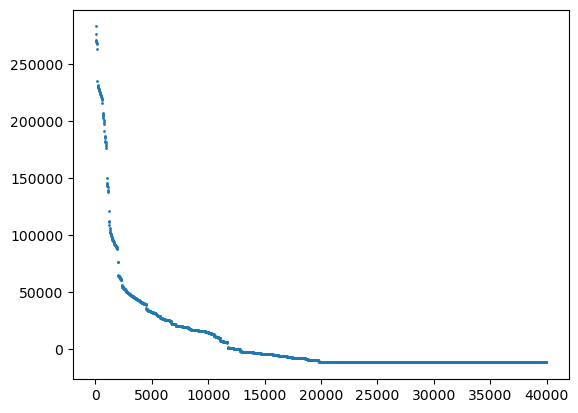

In [25]:
plt.scatter(tiempo_prom, decaimiento, s=1)

In [26]:
def fit(X, tau, C):
    return (total_decaimientos)*np.exp(-X/tau) + C

popt, pcov = curve_fit( fit, tiempo_prom, decaimiento, p0 = (2.2, 0), absolute_sigma=True, maxfev = 100000 )

In [27]:
tau = popt[0]
C = popt[1]

print(tau)
print(C)

1908.3995975772152
-5836.415719416853
